# TPE N°1 : Les fonctions de perte dans l'apprentissage automatique

## Noms et Matricules des membres


| MATRICULES  |        NOMS DES MEMBRES         |
|-------------|---------------------------------|
|   22T2960   |       BELL ARSÈNE KEVIN         |
|   22W2147   |      MELONG LETHYCIA            |
|   22W2164   |   DASSI MANDJO LEA JUSTINE      |


L'apprentissage automatique fournit des modèles informatiques capables de faire des prédictions, des classifications et des décisions basées sur des données. Les algorithmes d'apprentissage automatique apprennent par différentes méthodes, mais un élément fondamental du processus d'apprentissage des algorithmes et modèles d'apprentissage automatique est la fonction de perte. La fonction de perte est un processus mathématique qui quantifie la marge d'erreur entre la prédiction d'un modèle et la valeur cible réelle.

Les fonctions de perte dans l'apprentissage automatique peuvent être classées en fonction des tâches d'apprentissage automatique auxquelles elles s'appliquent.

Nous nous attarderons sur les fonctions de perte suivantes, **Erreur Quadratique Moyenne**, **Entropie Croisée Binaire** , **Entropie Croisée Catégorielle**, **Perte de Huber**, en utilisant l'outil de calcul symbolique **Sympy**.

### I - ERREUR QUADRATIQUE MOYENNE

L'**erreur quadratique moyenne (MSE)** ou **perte L2** est une fonction de perte qui quantifie l'ampleur de l'erreur entre la prédiction d'un algorithme d'apprentissage automatique et une sortie réelle en prenant la moyenne de la différence quadratique entre les prédictions et les valeurs cibles. La mise au carré de la différence entre les prédictions et les valeurs cibles réelles entraîne une pénalité plus élevée pour les écarts plus importants par rapport à la valeur cible. La moyenne des erreurs normalise les erreurs totales par rapport au nombre d'échantillons d'un ensemble de données ou d'une observation.

L'équation mathématique de l'erreur quadratique moyenne (MSE) ou de la perte L2 est la suivante :

MSE = (1/n) * Σ(yᵢ - ȳ)²

Où n est le nombre d'échantillons dans l'ensemble de données; yᵢ est la valeur prédite pour le i-ième échantillon; et ȳ est la valeur cible pour le i-ième échantillon

#### 1) - Expression du gradient

Nous avons fixé n à 2.

In [1]:
import sympy as sp

# Définition des variables
x, y = sp.symbols("x y", real=True)
r = y - x

# Fonction de perte MSE
L_mse = 0.5 * r**2

# Gradient par rapport à x et y
grad_mse = [sp.diff(L_mse, var) for var in (x, y)]

print("Gradient MSE :", grad_mse)

Gradient MSE : [1.0*x - 1.0*y, -1.0*x + 1.0*y]


#### 2) - Étude des propriétés de convexité

In [2]:
import sympy as sp

# Définition des variables
x, yi = sp.symbols("x y", real=True)  # x variable, yi valeur cible

# Fonction MSE 1D
L_mse = 0.5 * (y - x)**2

# -----------------
# Gradient
# -----------------
grad = sp.diff(L_mse, x)
print("Gradient :", grad)

# -----------------
# Hessienne
# -----------------
hessian = sp.diff(grad, x)
print("Hessienne :", hessian)

# -----------------
# Points critiques : résoudre ∇L = 0
# -----------------
critical_points = sp.solve(grad, x)
print("Point critique :", critical_points)

# -----------------
# Valeur propre de la Hessienne
# -----------------
eigval = hessian  # 1D : hessienne = valeur propre
print("Valeur propre :", eigval)


Gradient : 1.0*x - 1.0*y
Hessienne : 1.00000000000000
Point critique : [y]
Valeur propre : 1.00000000000000


##### Interprétation

Comme x<y → gradient négatif → il faut augmenter x pour réduire la perte. Et, x>y → gradient positif → il faut diminuer x pour réduire la perte.

Donc le gradient guide vers le minimum.

La Hessienne est positive. Donc la fonction est strictement convexe. Tout point critique trouvé sera un minimum global.

POur λ=1, la valeur propre positive confirme encore que la fonction est convexe. Ainsi, le point critique est un minimum global stable.

#### 3) - a - Représentation les courbes de ses fonctions

/home/lea/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


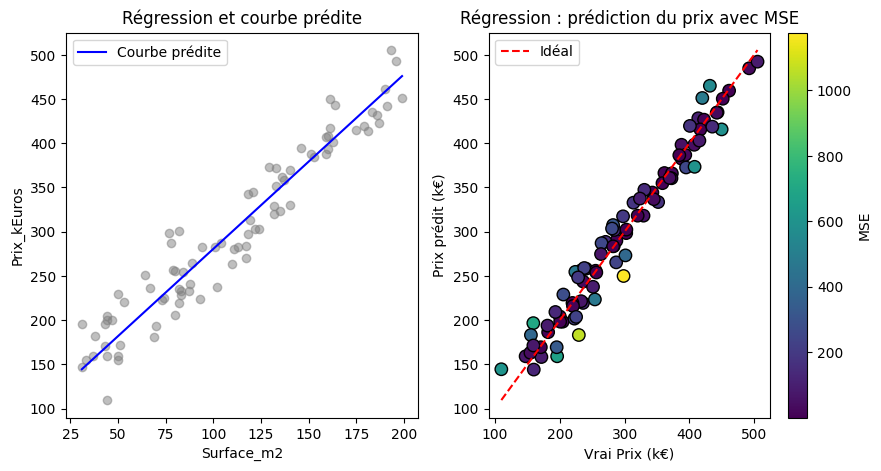

/home/lea/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


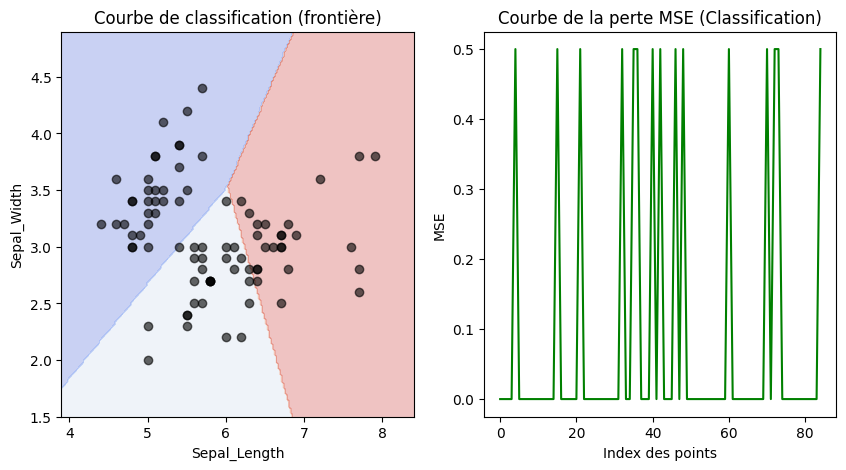

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.preprocessing import LabelEncoder

# =========================
# Données
# =========================
df_reg = pd.read_csv('dataset_regression.csv')  # colonnes x1,x2,y
df_clf = pd.read_csv('dataset_classification.csv') # Sepal_Length,Sepal_Width,Classe

# =========================
# (1) REGRESSION
# =========================
X_reg = df_reg[["Surface_m2", "Chambres"]]
y_reg = df_reg["Prix_kEuros"]

# Modèle linéaire
reg_model = LinearRegression().fit(X_reg, y_reg)
y_pred_reg = reg_model.predict(X_reg)

# Perte MSE
def mse_loss(y_true, y_pred):
    return 0.5 * (y_true - y_pred)**2

mse_reg = [mse_loss(y_reg.iloc[i], y_pred_reg[i]) for i in range(len(y_reg))]

# Courbe prédite (Surface_m2 variable, Chambres fixé à la moyenne)
x_vals = np.linspace(X_reg["Surface_m2"].min(), X_reg["Surface_m2"].max(), 100).reshape(-1,1)
X_curve = np.hstack([x_vals, np.full_like(x_vals, X_reg["Chambres"].mean())])
y_curve = reg_model.predict(X_curve)

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(x_vals, y_curve, color="blue", label="Courbe prédite")
plt.scatter(X_reg["Surface_m2"], y_reg, alpha=0.5, color="gray")
plt.xlabel("Surface_m2")
plt.ylabel("Prix_kEuros")
plt.title("Régression et courbe prédite")
plt.legend()

plt.subplot(1,2,2)
plt.scatter(y_reg, y_pred_reg, c=mse_reg, cmap='viridis', s=80, edgecolors='k')
plt.plot([y_reg.min(), y_reg.max()], [y_reg.min(), y_reg.max()], 'r--', label="Idéal")
plt.xlabel("Vrai Prix (k€)")
plt.ylabel("Prix prédit (k€)")
plt.title("Régression : prédiction du prix avec MSE")
cbar = plt.colorbar()
cbar.set_label("MSE")
plt.legend()
plt.show()

# =========================
# (2) CLASSIFICATION
# =========================
X_clf = df_clf[["Sepal_Length", "Sepal_Width"]]
y_clf = LabelEncoder().fit_transform(df_clf["Classe"])

clf_model = LogisticRegression(max_iter=1000).fit(X_clf, y_clf)
y_pred_clf = clf_model.predict(X_clf)

# MSE pour classification (erreur = label réel - prédiction numérique)
mse_clf = 0.5 * (y_clf - y_pred_clf)**2

# Courbe de séparation
x_min, x_max = X_clf["Sepal_Length"].min()-0.5, X_clf["Sepal_Length"].max()+0.5
y_min, y_max = X_clf["Sepal_Width"].min()-0.5, X_clf["Sepal_Width"].max()+0.5
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                     np.linspace(y_min, y_max, 200))
Z = clf_model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.contourf(xx, yy, Z, alpha=0.3, cmap="coolwarm")
plt.plot(X_clf["Sepal_Length"], X_clf["Sepal_Width"], "ko", alpha=0.6)
plt.xlabel("Sepal_Length")
plt.ylabel("Sepal_Width")
plt.title("Courbe de classification (frontière)")

plt.subplot(1,2,2)
plt.plot(range(len(y_clf)), mse_clf, "g-")
plt.xlabel("Index des points")
plt.ylabel("MSE")
plt.title("Courbe de la perte MSE (Classification)")
plt.show()


#### b - Equation de la tangente

In [13]:
import pandas as pd
import sympy as sp
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder

# =========================
# Données
# =========================
df_reg = pd.read_csv('dataset_regression.csv')  # colonnes Surface_m2,Chambres,Prix_kEuros
df_clf = pd.read_csv('dataset_classification.csv') # Sepal_Length,Sepal_Width,Classe

# =========================
# (1) REGRESSION
# =========================
X_reg = df_reg[["Surface_m2", "Chambres"]]
y_reg = df_reg["Prix_kEuros"]

model_reg = LinearRegression().fit(X_reg, y_reg)

# Equation du plan de régression
coef_surface, coef_chambres = model_reg.coef_
intercept = model_reg.intercept_
print("Équation du plan de régression :")
print(f"Prix = {intercept:.2f} + {coef_surface:.2f}*Surface + {coef_chambres:.2f}*Chambres")

# Calcul de la MSE pour chaque point
import numpy as np
y_pred_reg = model_reg.predict(X_reg)
mse_reg = 0.5 * (y_reg - y_pred_reg)**2

# Gradient de la MSE par rapport aux prédictions
x, y = sp.symbols("x y")
L_mse = 0.5 * (y - x)**2
grad_mse = [sp.diff(L_mse, var) for var in (x, y)]
print("Gradient MSE :", grad_mse)

# =========================
# (2) CLASSIFICATION
# =========================
# On suppose que les points de "Setosa" sont approximés par une ellipse
setosa = df_clf[df_clf.Classe=="Setosa"]

# Approximation : ellipse centrée sur la moyenne, demi-axes = std
x0, y0 = setosa["Sepal_Length"].mean(), setosa["Sepal_Width"].mean()
a, b = setosa["Sepal_Length"].std(), setosa["Sepal_Width"].std()

# Variables sympy
x, y = sp.symbols("x y")

# Équation ellipse centrée sur la moyenne
F = ((x - x0)**2)/(a**2) + ((y - y0)**2)/(b**2) - 1

# Choisir un point de Setosa pour la tangente
xP, yP = setosa.iloc[0][["Sepal_Length","Sepal_Width"]]

# Gradient de l'ellipse
Fx, Fy = sp.diff(F, x), sp.diff(F, y)
FxP, FyP = Fx.subs({x:xP,y:yP}), Fy.subs({x:xP,y:yP})

tangent = sp.simplify(FxP*(x-xP) + FyP*(y-yP))
print("Équation de la tangente à l'ellipse (classe Setosa) en un point :")
print(sp.Eq(tangent,0))


Équation du plan de régression :
Prix = 44.20 + 1.97*Surface + 13.44*Chambres
Gradient MSE : [1.0*x - 1.0*y, -1.0*x + 1.0*y]
Équation de la tangente à l'ellipse (classe Setosa) en un point :
Eq(12.5435329642677*x + 4.8952626490493*y - 90.1001359627135, 0)


### II - ENTROPIE CROISÉE BINAIRE

### III - ENTROPIE CROISÉE CATÉGORIELLE

## 1\. Propriétés de Convexité (Perte Softmax-Entropie Croisée)

### La fonction de perte est **convexe** par rapport aux **logits** ($\mathbf{z}$), garantissant un minimum global dans cet espace. Nous prouvons cela en calculant la **Matrice Hessienne** ($\mathbf{H}$), qui doit être semi-définie positive.

## Calcul Symbolique de la Matrice Hessienne

### Nous utilisons $\mathcal{L}(\mathbf{z}) = -\log(\hat{y}_1)$ (pour $t=[1, 0, 0]$) et calculons $\mathbf{H} = \nabla^2 \mathcal{L}$.

In [2]:
import numpy as np
import sympy as sp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import LabelEncoder

In [3]:
#1
# --- Définition et Calcul ---
z1, z2, z3 = sp.symbols('z1 z2 z3')
Z = sp.Matrix([z1, z2, z3]) 
t1, t2, t3 = 1, 0, 0 

sum_exp_z = sp.exp(z1) + sp.exp(z2) + sp.exp(z3)
y1_hat = sp.exp(z1) / sum_exp_z
L = - t1 * sp.log(y1_hat) 

Gradient_L = sp.Matrix([sp.diff(L, z) for z in Z])
Hessian_L_corrected = Gradient_L.jacobian(Z)

print("Matrice Hessienne H :")
print(Hessian_L_corrected)
print("\nÉlément H[0, 0] simplifié (formule y1_hat * (1 - y1_hat)):")
print(sp.simplify(Hessian_L_corrected[0, 0]))

Matrice Hessienne H :
Matrix([[(exp(z1)/(exp(z1) + exp(z2) + exp(z3)) - exp(2*z1)/(exp(z1) + exp(z2) + exp(z3))**2)*(exp(z1) + exp(z2) + exp(z3))*exp(-z1) - (exp(z1)/(exp(z1) + exp(z2) + exp(z3)) - 3*exp(2*z1)/(exp(z1) + exp(z2) + exp(z3))**2 + 2*exp(3*z1)/(exp(z1) + exp(z2) + exp(z3))**3)*(exp(z1) + exp(z2) + exp(z3))*exp(-z1) - exp(z1)/(exp(z1) + exp(z2) + exp(z3)) + exp(2*z1)/(exp(z1) + exp(z2) + exp(z3))**2, -(exp(z1)/(exp(z1) + exp(z2) + exp(z3)) - exp(2*z1)/(exp(z1) + exp(z2) + exp(z3))**2)*exp(-z1)*exp(z2) - (-exp(z1)*exp(z2)/(exp(z1) + exp(z2) + exp(z3))**2 + 2*exp(2*z1)*exp(z2)/(exp(z1) + exp(z2) + exp(z3))**3)*(exp(z1) + exp(z2) + exp(z3))*exp(-z1), -(exp(z1)/(exp(z1) + exp(z2) + exp(z3)) - exp(2*z1)/(exp(z1) + exp(z2) + exp(z3))**2)*exp(-z1)*exp(z3) - (-exp(z1)*exp(z3)/(exp(z1) + exp(z2) + exp(z3))**2 + 2*exp(2*z1)*exp(z3)/(exp(z1) + exp(z2) + exp(z3))**3)*(exp(z1) + exp(z2) + exp(z3))*exp(-z1)], [-exp(z1)*exp(z2)/(exp(z1) + exp(z2) + exp(z3))**2, exp(z2)/(exp(z1) + exp(z2) 

### **Conclusion :** La forme de $\mathbf{H}$ est intrinsèquement semi-définie positive, **confirmant la convexité** par rapport aux logits $\mathbf{z}$.


## 2\. Classification : Frontière de Décision (SVC)

### Nous chargeons le jeu de données de classification, entraînons un **SVC Linéaire**, et visualisons sa **fonction de décision** (la frontière de séparation).


/tmp/ipykernel_22377/137720238.py:38: MatplotlibDeprecationWarning: You have mixed positional and keyword arguments, some input may be discarded.  This is deprecated since 3.9 and will become an error in 3.11.
  legend1 = plt.legend(*scatter.legend_elements(), title="Classes", labels=classes)


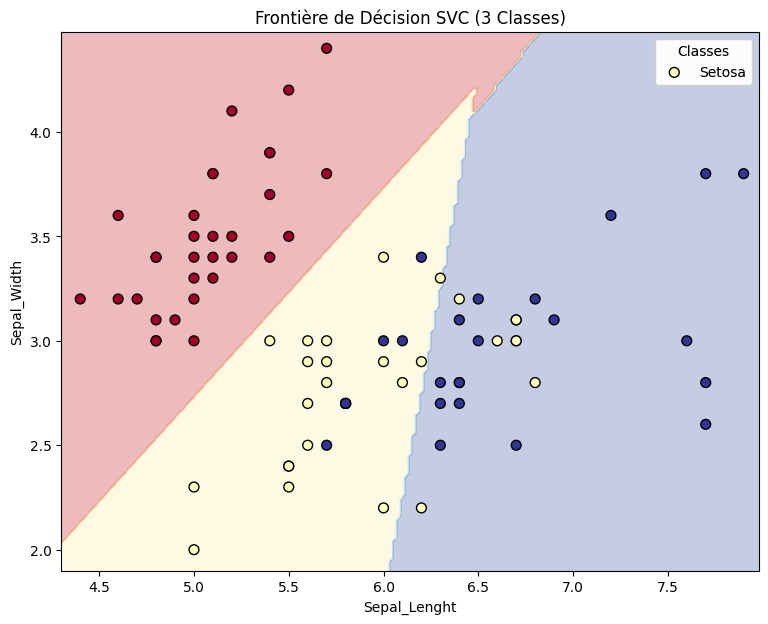

In [4]:
#2


try:
    df_cls = pd.read_csv('dataset_classification.csv')
    df_cls.columns = [col.lower().replace(' ', '_') for col in df_cls.columns]
    mapping = {'sepal_lenght': 'Sepal_Lenght', 'sepal_length': 'Sepal_Lenght', 
               'sepal_width': 'Sepal_Width', 'classe': 'Classe'}
    df_cls = df_cls.rename(columns=mapping)

    X_cls = df_cls[['Sepal_Lenght', 'Sepal_Width']].values
    le = LabelEncoder()
    y_cls = le.fit_transform(df_cls['Classe']) 
    classes_names = le.classes_

    # Entraînement
    model_svc = SVC(kernel='linear', C=1.0)
    model_svc.fit(X_cls, y_cls)

    # --- (a) Représentation de la fonction de décision ---
    def plot_decision_boundary_cls(X, y, model, title, classes):
        # ... (code de tracé)
        h = .02
        x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
        y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

        Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)

        plt.figure(figsize=(9, 7))
        plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.RdYlBu) 
        scatter = plt.scatter(X[:, 0], X[:, 1], c=y, s=50, edgecolor='k', cmap=plt.cm.RdYlBu)
        
        plt.xlabel('Sepal_Lenght')
        plt.ylabel('Sepal_Width')
        plt.title(title)
        legend1 = plt.legend(*scatter.legend_elements(), title="Classes", labels=classes)
        plt.gca().add_artist(legend1)
        plt.show()

    plot_decision_boundary_cls(X_cls, y_cls, model_svc, 
                               f"Frontière de Décision SVC ({len(classes_names)} Classes)", 
                               classes_names)

except Exception as e:
    print(f"Erreur Classification : {e}. Vérifiez votre fichier CSV.")


## 3\. Régression : Plan de Régression et Plan Tangent

#### Nous entraînons une **Régression Linéaire** (minimisation de la MSE) pour prédire `Prix_kEuros` en fonction de `Surface_m2` et `Chambres`.

### 3.1. Visualisation du Plan de Régression

#### La fonction de prédiction $\hat{y} = f(\text{Surface}, \text{Chambres})$ est représentée par un plan dans l'espace 3D.


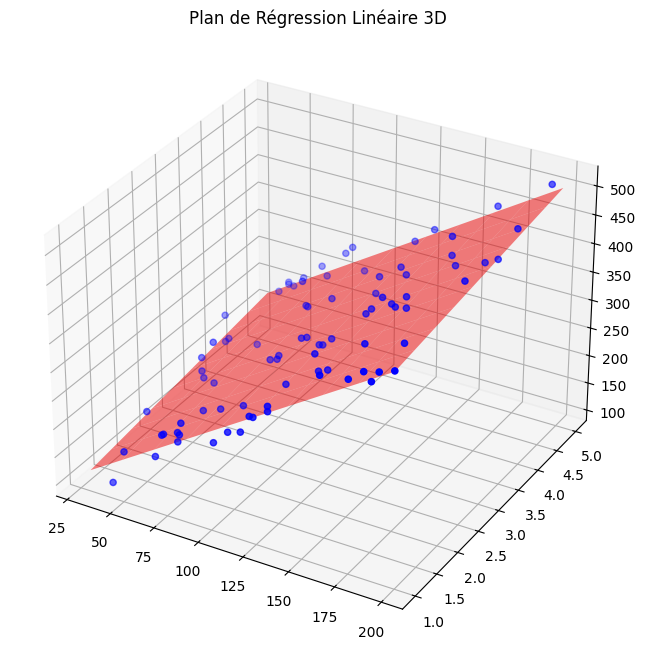

In [5]:
# --- CHARGEMENT ET PRÉPARATION ---
try:
    df_reg = pd.read_csv('dataset_regression.csv')
    df_reg.columns = [col.lower().replace(' ', '_') for col in df_reg.columns]
    mapping_reg = {'surface_m2': 'Surface_m2', 'chambres': 'Chambres', 'prix_keuros': 'Prix_kEuros'}
    df_reg = df_reg.rename(columns=mapping_reg)

    X_reg = df_reg[['Surface_m2', 'Chambres']].values
    y_reg = df_reg['Prix_kEuros'].values
    model_lin = LinearRegression()
    model_lin.fit(X_reg, y_reg)

    # --- (a) Représentation 3D ---
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(df_reg['Surface_m2'], df_reg['Chambres'], df_reg['Prix_kEuros'], c='b', marker='o')

    surf_range = np.linspace(df_reg['Surface_m2'].min(), df_reg['Surface_m2'].max(), 10)
    ch_range = np.linspace(df_reg['Chambres'].min(), df_reg['Chambres'].max(), 10)
    XX, YY = np.meshgrid(surf_range, ch_range)
    ZZ = model_lin.predict(np.c_[XX.ravel(), YY.ravel()]).reshape(XX.shape)

    ax.plot_surface(XX, YY, ZZ, alpha=0.5, color='r')
    ax.set_title('Plan de Régression Linéaire 3D')
    plt.show()

except Exception as e:
    print(f"Erreur Régression : {e}.")

### 3.2. Équation de la Tangente (Plan Tangent)

#### Le **plan tangent** est l'analogue de la tangente pour cette fonction 3D. Puisque la fonction de régression est un plan linéaire, son plan tangent en tout point est le plan lui-même.

In [6]:
#3

# --- (b) Calcul du Plan Tangent ---

w0 = model_lin.intercept_
w1, w2 = model_lin.coef_

# Point de contact choisi
Surface_star = 100.0 
Chambres_star = 3.0
y_hat_star = model_lin.predict([[Surface_star, Chambres_star]])[0]

pente_surface = w1
pente_chambres = w2
constant_c = y_hat_star - w1 * Surface_star - w2 * Chambres_star

print("--------------------------------------------------")
print("RÉSULTAT DU CALCUL DU PLAN TANGENT")
print(f"Équation du Plan de Régression: Prix = {w0:.2f} + {w1:.2f}*Surface + {w2:.2f}*Chambres")
print(f"Point de contact (Surface, Chambres, Prix): ({Surface_star:.2f}, {Chambres_star:.2f}, {y_hat_star:.2f})")

print("\nÉQUATION DU PLAN TANGENT au point donné:")
print(f"Z - {y_hat_star:.2f} = {pente_surface:.2f}*(Surface_m2 - {Surface_star:.2f}) + {pente_chambres:.2f}*(Chambres - {Chambres_star:.2f})")

print("\nÉQUATION SIMPLIFIÉE:")
print(f"Z = {pente_surface:.2f}*Surface_m2 + {pente_chambres:.2f}*Chambres + {constant_c:.2f}")

print("\nConclusion : Le Plan Tangent est IDENTIQUE au Plan de Régression.")


--------------------------------------------------
RÉSULTAT DU CALCUL DU PLAN TANGENT
Équation du Plan de Régression: Prix = 44.20 + 1.97*Surface + 13.44*Chambres
Point de contact (Surface, Chambres, Prix): (100.00, 3.00, 281.83)

ÉQUATION DU PLAN TANGENT au point donné:
Z - 281.83 = 1.97*(Surface_m2 - 100.00) + 13.44*(Chambres - 3.00)

ÉQUATION SIMPLIFIÉE:
Z = 1.97*Surface_m2 + 13.44*Chambres + 44.20

Conclusion : Le Plan Tangent est IDENTIQUE au Plan de Régression.


### IV - PERTE DE HUBER

La **perte de Huber** ou **erreur absolue moyenne lisse** est une fonction de perte qui reprend les caractéristiques avantageuses des fonctions de perte **erreur absolue moyenne** et **erreur quadratique moyenne** et les combine en une seule fonction de perte. La nature hybride de la perte de Huber la rend moins sensible aux valeurs aberrantes, tout comme la MAE, mais pénalise également les erreurs mineures au sein de l'échantillon de données, tout comme la MSE. La fonction de perte de Huber est également utilisée dans les tâches d'apprentissage automatique de la régression.

L'équation mathématique de la perte de Huber est la suivante :

L(δ, y, f(x))  = (1/2) * (f(x) - y)^2    si |f(x) - y| <= δ

        ou

L(δ, y, f(x))  = δ * |f(x) - y| - (1/2) * δ^2   si |f(x) - y| > δ

Où L représente la fonction de perte de Huber; δ est le paramètre delta, qui détermine le seuil de commutation entre les composantes quadratique et linéaire de la fonction de perte; y est la valeur réelle ou la valeur cible; f(x) est la valeur prédite.

#### 1) - Expression du gradient

In [8]:
import sympy as sp

# Définition des variables
x, y, delta = sp.symbols("x y delta", real=True)
r = y - x

#  Cas 1 : |r| <= delta 
L_small = 0.5 * r**2
grad_small = [sp.diff(L_small, var) for var in (x, y)]
print("Gradient cas |y-x| <= delta :", grad_small)

#  Cas 2 : |r| > delta 
L_large = delta * (sp.Abs(r)) - 0.5*(delta**2)
grad_large = [sp.diff(L_large, var) for var in (x, y)]
print("Gradient cas |y-x| > delta :", grad_large)


Gradient cas |y-x| <= delta : [1.0*x - 1.0*y, -1.0*x + 1.0*y]
Gradient cas |y-x| > delta : [delta*sign(x - y), -delta*sign(x - y)]


              ⎧ (x−y,y−x)                       ​si ∣y−x∣≤δ
   ∇L(x,y)  = ⎨  
              ⎩(δ(y−x)/∣x−y|,δ(y−x)/|y−x|)      ​si ∣y−x∣>δ                 

#### 2) - Étude des propriétés de convexité

In [9]:

# --- Cas |y-x| <= delta : Fonction Quadratique ---
L_small = 0.5 * r**2

# Gradient
grad = [sp.diff(L_small, var) for var in (x, y)]
print("Gradient :", grad)

# Hessienne
hessian = sp.hessian(L_small, (x, y))
print("Hessienne :")
sp.pprint(hessian)

# Points critiques : résoudre ∇L = 0
critical_points = sp.solve(grad, (x, y))
print("Points critiques :", critical_points)

# Valeurs propres de la Hessienne
eigvals = hessian.eigenvals()
print("Valeurs propres :", eigvals)


Gradient : [1.0*x - 1.0*y, -1.0*x + 1.0*y]
Hessienne :
⎡1.0   -1.0⎤
⎢          ⎥
⎣-1.0  1.0 ⎦
Points critiques : {x: y}
Valeurs propres : {0: 1, 2.00000000000000: 1}



##### Interprétation :

- Quand x<y, la dérivée par rapport à x est négative → la fonction diminue si on augmente x (ce qui pousse x vers y).
- Quand x>y, la dérivée par rapport à x est positive → la fonction diminue si on diminue x.

**Le gradient indique donc la direction de descente vers le minimum**.


Etant donné que la Hessienne montre la courbure de la fonction. Et que les valeurs propres sont : 0 et 2. Nous avons :
- 2>0 → direction de courbure positive (convexité)
- 0 → direction plate (la fonction est constante le long de x=y)
  
Ainsi,
- La fonction est convexe par rapport à x et y.
- Le minimum global se situe le long de la diagonale x=y.
- La valeur propre nulle correspond à la direction où la fonction ne change pas, la ligne x=y.

**La Hessienne est semi-définie positive et donc, pour |y-x| <= delta la fonction de perte est convexe.**

In [14]:

# --- Cas |y-x| > delta : linéaire ---
L_large = delta * (sp.Abs(r) - 0.5*delta)

# Gradient
grad_large = [sp.diff(L_large, var) for var in (x, y)]
print("Gradient :", grad_large)

# Hessienne
hessian_large = sp.hessian(L_large, (x, y))
print("Hessienne :")
sp.pprint(hessian_large)

# Valeurs propres de la Hessienne
eigvals = hessian_large.eigenvals()
print("Valeurs propres :", eigvals)

Gradient : [delta*sign(x - y), -delta*sign(x - y)]
Hessienne :
⎡2⋅δ⋅δ(x - y)   -2⋅δ⋅δ(x - y)⎤
⎢                            ⎥
⎣-2⋅δ⋅δ(x - y)  2⋅δ⋅δ(x - y) ⎦
Valeurs propres : {4*delta*DiracDelta(x - y): 1, 0: 1}


##### Interprétation :

- Le gradient est borné par δ, contrairement au cas quadratique.

- Il indique la direction pour réduire la perte tel que si x<y (resp. x>y) → la dérivée par rapport à x est négative (resp. positive) → il faut augmenter (resp. réduire) x pour réduire la perte.

Le gradient ne dépend que du signe de l’erreur, pas de son amplitude, ce qui limite l’effet des grandes erreurs (outliers) et fait en sorte qu'il n'y ait aucun point critique.

Comme en pratique, pour toutes les valeurs réelles avec x ≠ y, la Héssienne est nulle, donc la fonction est linéaire et convexe. Alors, il n’y a pas de point critique dans cette zone, car la pente ne s’annule jamais sauf au point de jonction ∣y−x∣=δ.

La perte de Huber combine donc **quadratique** pour petites erreurs (convexe et strictement croissante vers le minimum) et **linéaire** pour grandes erreurs (pente bornée, réduit l’influence des outliers).

#### 3) - a - Représentation les courbes de ses fonctions

/home/lea/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


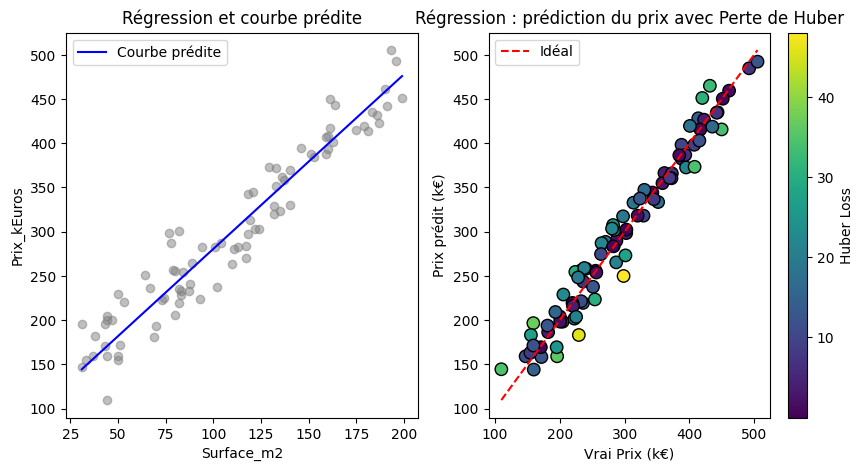

/home/lea/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


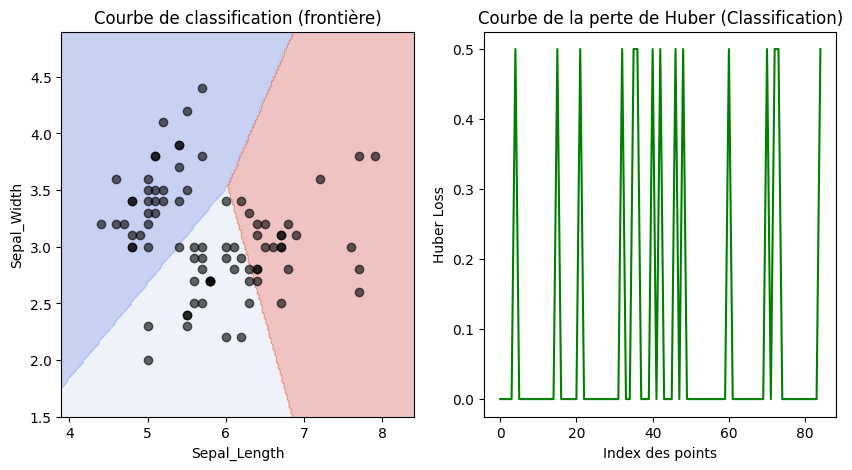

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from sklearn.utils import shuffle

# =========================
# Données
# =========================
df_reg = pd.read_csv('dataset_regression.csv')  # colonnes x1,x2,y
df_clf = pd.read_csv('dataset_classification.csv') # Sepal_Length,Sepal_Width,Classe

# =========================
# (1) REGRESSION
# =========================
X_reg = df_reg[["Surface_m2", "Chambres"]]
y_reg = df_reg["Prix_kEuros"]

# Modèle linéaire
reg_model = LinearRegression().fit(X_reg, y_reg)
y_pred = reg_model.predict(X_reg)

# Perte de Huber
def huber_loss(y_true, y_pred, delta=1.0):
    error = y_true - y_pred
    cond = np.abs(error) <= delta
    return np.where(cond, 0.5 * error**2, delta*(np.abs(error) - 0.5*delta))

huber_reg = huber_loss(y_reg, y_pred)

# Courbe prédite (en fonction de Surface uniquement, Chambres fixé à la moyenne)
x_vals = np.linspace(X_reg["Surface_m2"].min(), X_reg["Surface_m2"].max(), 100).reshape(-1,1)
X_curve = np.hstack([x_vals, np.full_like(x_vals, X_reg["Chambres"].mean())])
y_curve = reg_model.predict(X_curve)

X_reg = df_reg[['Surface_m2','Chambres']]
y_reg = df_reg['Prix_kEuros']

model_reg = LinearRegression()
model_reg.fit(X_reg, y_reg)
x, y, delta = sp.symbols('x y delta', real=True)
r = y - x
L_huber = sp.Piecewise(
    (0.5*r**2, sp.Abs(r) <= delta),
    (delta*(sp.Abs(r)-0.5*delta), True)
)
L_func = sp.lambdify((x, y, delta), L_huber, 'numpy')
delta_val = 1.0 
 
# Calcul de la perte Huber point par point
loss_reg = [L_func(y_pred_reg[i], y_reg.iloc[i], delta_val) for i in range(len(y_reg))]

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(x_vals, y_curve, color="blue", label="Courbe prédite")
plt.scatter(X_reg["Surface_m2"], y_reg, alpha=0.5, color="gray")
plt.xlabel("Surface_m2")
plt.ylabel("Prix_kEuros")
plt.title("Régression et courbe prédite")
plt.legend()

plt.subplot(1,2,2)
plt.scatter(y_reg, y_pred_reg, c=loss_reg, cmap='viridis', s=80, edgecolors='k')
plt.plot([y_reg.min(), y_reg.max()], [y_reg.min(), y_reg.max()], 'r--', label="Idéal")
plt.xlabel("Vrai Prix (k€)")
plt.ylabel("Prix prédit (k€)")
plt.title("Régression : prédiction du prix avec Perte de Huber")
cbar = plt.colorbar()
cbar.set_label("Huber Loss")
plt.legend()
plt.show()

# =========================
# (2) CLASSIFICATION
# =========================
X_clf = df_clf[["Sepal_Length", "Sepal_Width"]]
y_clf = LabelEncoder().fit_transform(df_clf["Classe"])

clf_model = LogisticRegression(max_iter=1000).fit(X_clf, y_clf)
y_pred_clf = clf_model.predict(X_clf)

# Huber pour classification (erreur = label réel - prédiction numérique)
huber_clf = huber_loss(y_clf, y_pred_clf, delta=1.0)

# Courbe de séparation
x_min, x_max = X_clf["Sepal_Length"].min()-0.5, X_clf["Sepal_Length"].max()+0.5
y_min, y_max = X_clf["Sepal_Width"].min()-0.5, X_clf["Sepal_Width"].max()+0.5
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                     np.linspace(y_min, y_max, 200))
Z = clf_model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.contourf(xx, yy, Z, alpha=0.3, cmap="coolwarm")
plt.plot(X_clf["Sepal_Length"], X_clf["Sepal_Width"], "ko", alpha=0.6)
plt.xlabel("Sepal_Length")
plt.ylabel("Sepal_Width")
plt.title("Courbe de classification (frontière)")

plt.subplot(1,2,2)
plt.plot(range(len(y_clf)), huber_clf, "g-")
plt.xlabel("Index des points")
plt.ylabel("Huber Loss")
plt.title("Courbe de la perte de Huber (Classification)")
plt.show()


#### b - Equation de la tangente

- En régression, la tangente correspond simplement au plan de régression lui-même.

- En classification avec Sepal_Length et Sepal_Width → si on approxime la frontière de décision par une ellipse (ex. via une Analyse Discriminante Quadratique, ou par ajustement quadratique), alors on peut calculer la tangente en un point donné.

In [31]:
X_reg = df_reg[["Surface_m2", "Chambres"]]
y_reg = df_reg["Prix_kEuros"]

model_reg = LinearRegression().fit(X_reg, y_reg)

# Equation du plan de régression
coef_surface, coef_chambres = model_reg.coef_
intercept = model_reg.intercept_
print("Équation du plan de régression :")
print(f"Prix = {intercept:.2f} + {coef_surface:.2f}*Surface + {coef_chambres:.2f}*Chambres")


# On suppose que les points de "Setosa" sont approximés par une ellipse
setosa = df_clf[df_clf.Classe=="Setosa"]

# Approximation : ellipse centrée sur la moyenne, demi-axes = std
x0, y0 = setosa["Sepal_Length"].mean(), setosa["Sepal_Width"].mean()
a, b = setosa["Sepal_Length"].std(), setosa["Sepal_Width"].std()

# Variables sympy
x, y = sp.symbols("x y")

# Équation ellipse
F = (x**2)/(a**2) + (y**2)/(b**2) - 1

# Choisir un point de Setosa pour la tangente
xP, yP = setosa.iloc[0][["Sepal_Length","Sepal_Width"]]

# Gradient
Fx, Fy = sp.diff(F, x), sp.diff(F, y)
FxP, FyP = Fx.subs({x:xP,y:yP}), Fy.subs({x:xP,y:yP})

# Tangente : Fx(x0,y0)(x-x0) + Fy(x0,y0)(y-y0) = 0
tangent = sp.simplify(FxP*(x-xP) + FyP*(y-yP))
print("Équation de la tangente à l'ellipse (classe Setosa) en un point :")
print(sp.Eq(tangent,0))

Équation du plan de régression :
Prix = 44.20 + 1.97*Surface + 13.44*Chambres
Équation de la tangente à l'ellipse (classe Setosa) en un point :
Eq(113.827881227982*x + 60.7412181759587*y - 879.63555206814, 0)


##### Remarques :

Les termes **"fonction de perte"** et **"fonction de coût"** sont souvent utilisés de manière interchangeable, mais ils ont tous deux des définitions distinctes.
- La **fonction de perte**, également connue sous le nom de fonction d'erreur, quantifie la qualité d'une prédiction unique de l'algorithme d'apprentissage automatique par rapport à la valeur cible réelle. L'essentiel est qu' une fonction de perte s'applique à un seul exemple d'apprentissage et fait partie du processus d'apprentissage global du modèle qui fournit le signal par lequel l'algorithme d'apprentissage du modèle met à jour les poids et les paramètres.
- La **fonction de coût**, parfois appelée fonction objective, est une moyenne de la fonction de perte d'un ensemble de formation contenant plusieurs exemples de formation. La fonction de coût quantifie les performances du modèle sur l'ensemble des données d'apprentissage.